In [71]:
import pandas as pd
import re
import nltk
nltk.download("vader_lexicon")
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package vader_lexicon to C:\Users\Muhammad Ade
[nltk_data]     Aulia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [72]:
df = pd.read_csv("data/dataProgramIKN.csv")
df = df[['username', 'full_text']]
df

,username,full_text
0,BppnIkn37632,INFO Star Safety Bersama Universitas Insan Bud...
1,BppnIkn37632,INFO Star Safety Bersama Universitas Insan Bud...
2,BppnIkn37632,INFO Star Safety Bersama Universitas Insan Bud...
3,ikn_merdeka,@pro_gibran_ Semoga program yang di bawa akan ...
4,RadenAjeng_Ei,"@MurtadhaOne1 IKN adalah Program Penjajah, dan..."
...,...,...
1012,TrifanyKim96,@just2yeon @tubirfess Tapi sih ... Ada isu yan...
1013,ServiceAperture,@RafsAkbar Tbf gw kontra semua program diatas....
1014,SIJORIII,@DedynurPalakka @psi_id 6. Program makan grati...
1015,neysaalshara,Wujudkan Ketahanan Pangan IKN Program Petani M...


## 1. CLEANING DATA

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   username   1017 non-null   object
 1   full_text  1017 non-null   object
dtypes: object(2)
memory usage: 16.0+ KB


In [74]:
df = df.drop_duplicates(subset=['full_text'])

In [75]:
df = df.dropna()

In [76]:
df.shape

(1012, 2)

In [77]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [78]:
df['full_text'] = df['full_text'].str.lower()

In [79]:
df

,username,full_text
0,BppnIkn37632,info star safety bersama universitas insan bud...
1,BppnIkn37632,info star safety bersama universitas insan bud...
3,ikn_merdeka,semoga program yang di bawa akan sangat memban...
4,RadenAjeng_Ei,ikn adalah program penjajah dan tiap warga neg...
5,8angher,alhamdulillah mungkin krn prabowogibran berkom...
...,...,...
1012,TrifanyKim96,tapi sih ada isu yang mengatakan israel akan b...
1013,ServiceAperture,tbf gw kontra semua program diatas ikn pun sem...
1014,SIJORIII,6 program makan gratis 5 thn 7 jual kaving ikn
1015,neysaalshara,wujudkan ketahanan pangan ikn program petani m...


## 2. Preprocessing

In [80]:
df = df.drop_duplicates(subset=['full_text'])

In [81]:
df = df.reset_index(drop=True)

### 2.1 Normalize

In [82]:
# Normalisasi
norm = {'kl ':'kalau ', ' kl ':' kalau ', ' iknnanti ':' ikn nanti ', ' pny ':' punya ', ' jd ':' jadi ', ' thn ':' tahun ', ' yg ':' yang ', ' udh ':' udah ', 'wkwk ':' ', ' min ':' kak ', ' malem ':' malam', ' malem2 ':' malam ', ' sm ':' sama ', ' dy ':' dia ', ' lg ':' lagi ', ' skrg ':' sekarang ', ' ddpn ':' didepan ', ' makasi ':' makasih ', ' pertamaz ':' pertamax ', ' jg ':' juga ', ' donk ':' dong ', ' ikutann ':' ikutan ', ' banyakk ':' banyak ', ' twt ':' tweet', 'mantaap ':'mantap ', ' juarak':' juara ', 'daridulu ':'dari dulu ', 'siapp ':'siap ', ' gamau ':' tidak mau ', ' sll ':' selalu ', ' qu ':' aku ', ' krn ':' karena ', ' irii':' iri', ' muluu ':' terus ', 'mada ':'masa ', 'jgn ':'jangan ', ' jgn ':' jangan ', ' muluuu ':' terus ', 'ntar ':'nanti ', ' awtnya':' awetnya', 'gg ':'keren ', ' kerennn':' keren ', ' bisaa ':' bisa ', 'gaaa':'tidak ', " yg ": " yang ", ' nyampe':' sampai', ' nyampe ':' sampai ', ' lu ':' kamu ', ' ikhlaaasss ':' ikhlas ', ' gak ':' tidak ', ' klo ':' kalo ', ' amp ': ' sampai ', ' ga ':' tidak ', ' yaaaa':' ya ', 'betolll ':'betul ', ' kaga ':' tidak ', ' idk ':' tidak tahu ', ' jkt ':' jakarta ', ' lo ':' kamu ', ' bjir ':' ', ' kek ':' seperti ', ' yg ':' yang ', ' utk ':' untuk ', 'kismin ':'miskin ', ' kismin ':' miskin ', ' pd ':' pada ', ' dgn ':' dengan ', ' ituu ':' itu ', ' jg ':' juga ', 'yoi':'iya ', ' yoi ':' iya ', 'org2 ':'orang ', ' tak ':' tidak ', ' kyk ':' seperti ', ' sbg ':' sebagai ', ' anjjjj ':' ', ' bgt ':' banget ', 'km ':'kamu ', ' km ':' kamu', ' byk ':' banyak ', ' lg ':' lagi ', ' mrk ':' mereka ', ' blm ':' belum '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,username,full_text
0,BppnIkn37632,info star safety bersama universitas insan bud...
1,ikn_merdeka,semoga program yang di bawa akan sangat memban...
2,RadenAjeng_Ei,ikn adalah program penjajah dan tiap warga neg...
3,8angher,alhamdulillah mungkin karena prabowogibran ber...
4,adichrissaputra,dulu menentang habis habisan program pembangun...
...,...,...
976,TrifanyKim96,tapi sih ada isu yang mengatakan israel akan b...
977,ServiceAperture,tbf gw kontra semua program diatas ikn pun sem...
978,SIJORIII,6 program makan gratis 5 tahun 7 jual kaving ikn
979,neysaalshara,wujudkan ketahanan pangan ikn program petani m...


### 2.2 Stopwords

In [83]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,username,full_text
0,BppnIkn37632,info star safety bersama universitas insan bud...
1,ikn_merdeka,semoga program di bawa sangat membantu generas...
2,RadenAjeng_Ei,ikn program penjajah tiap warga negara menduku...
3,8angher,alhamdulillah mungkin prabowogibran berkomitme...
4,adichrissaputra,dulu menentang habis habisan program pembangun...


### 2.3 Tokenized

In [84]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0      [info, star, safety, bersama, universitas, ins...
1      [semoga, program, di, bawa, sangat, membantu, ...
2      [ikn, program, penjajah, tiap, warga, negara, ...
3      [alhamdulillah, mungkin, prabowogibran, berkom...
4      [dulu, menentang, habis, habisan, program, pem...
                             ...                        
976    [sih, isu, mengatakan, israel, buka, kantor, d...
977    [tbf, gw, kontra, semua, program, diatas, ikn,...
978    [6, program, makan, gratis, 5, tahun, 7, jual,...
979    [wujudkan, ketahanan, pangan, ikn, program, pe...
980    [yah, walau, gue, setuju, ama, poin, sebelumny...
Name: full_text, Length: 981, dtype: object

### 2.4 Stemming (Tidak Wajib di Runing!)

In [85]:
# Stemming
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()
#   do = []
#   for w in text_cleaning:
#     dt = stemmer.stem(w)
#     do.append(dt)
#   d_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# tokenized = tokenized.apply(stemming)
# tokenized

## 3. LABELING

In [86]:
df = pd.read_csv('data/hasil_terjemahan.csv', index_col=0)
df.head()

,full_text,tweet_english
0,info star safety sama universitas insan budi u...,info star safety with human university Budi UT...
1,moga program di bawa sangat bantu generasi mud...,let's hope the program is very helpful to the ...
2,ikn program jajah tiap warga negara dukung ipk...,ikn jajah program every citizen supports ipk 2...
3,alhamdulillah mungkin prabowogibran komitmen t...,alhamdulillah maybe prabowogibran commitment t...
4,dulu tentang habis habis program bangun iknmak...,first about the end of the program to build it...


In [87]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()
df['positif'] = [sentiments.polarity_scores(i)["pos"] for i in df['tweet_english']]
df['negatif'] = [sentiments.polarity_scores(i)["neg"] for i in df['tweet_english']]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df['tweet_english']]
df.head()

,full_text,tweet_english,positif,negatif,Compound
0,info star safety sama universitas insan budi u...,info star safety with human university Budi UT...,0.227,0.000,0.6486
1,moga program di bawa sangat bantu generasi mud...,let's hope the program is very helpful to the ...,0.353,0.000,0.7178
2,ikn program jajah tiap warga negara dukung ipk...,ikn jajah program every citizen supports ipk 2...,0.172,0.000,0.3612
3,alhamdulillah mungkin prabowogibran komitmen t...,alhamdulillah maybe prabowogibran commitment t...,0.206,0.000,0.3818
4,dulu tentang habis habis program bangun iknmak...,first about the end of the program to build it...,0.000,0.105,-0.2755


In [88]:
score = df['Compound'].values
sentiment = []
for i in score:
  if i >= 0.05:
    sentiment.append("positif")
  else:
    sentiment.append("negatif")
df["Sentiment"] = sentiment
df.head()

,full_text,tweet_english,positif,negatif,Compound,Sentiment
0,info star safety sama universitas insan budi u...,info star safety with human university Budi UT...,0.227,0.000,0.6486,positif
1,moga program di bawa sangat bantu generasi mud...,let's hope the program is very helpful to the ...,0.353,0.000,0.7178,positif
2,ikn program jajah tiap warga negara dukung ipk...,ikn jajah program every citizen supports ipk 2...,0.172,0.000,0.3612,positif
3,alhamdulillah mungkin prabowogibran komitmen t...,alhamdulillah maybe prabowogibran commitment t...,0.206,0.000,0.3818,positif
4,dulu tentang habis habis program bangun iknmak...,first about the end of the program to build it...,0.000,0.105,-0.2755,negatif


## 4. VISUALIZATION

In [89]:
tb_counts = df.Sentiment.value_counts()
tb_counts

Sentiment
positif    678
negatif    306
Name: count, dtype: int64

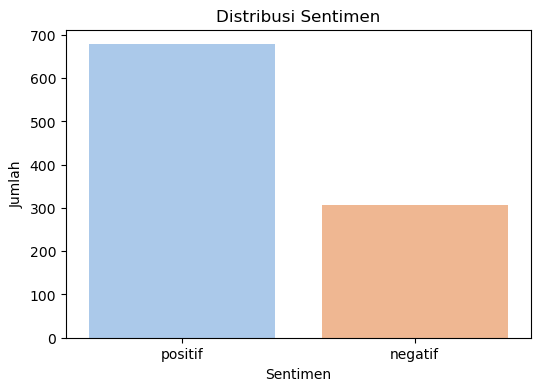

In [90]:
sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [91]:
data_negatif = df[df['Sentiment'] == 'negatif']
data_positif = df[df['Sentiment'] == 'positif']

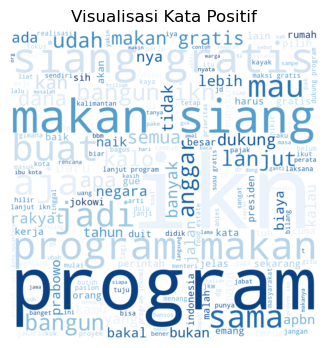

In [92]:
all_text_s1 = ' '.join(word for word in data_positif["full_text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

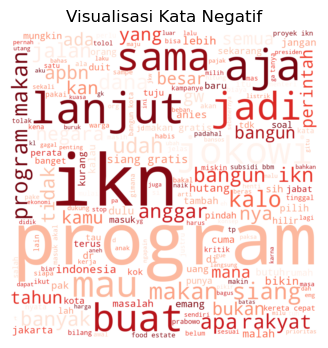

In [93]:
all_text_s0 = ' '.join(word for word in data_negatif["full_text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

## 5. SPLITING DATA

In [94]:
X=df.full_text
y=df.Sentiment

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42)

In [96]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 836
Banyak data x_test  : 148
Banyak data y_train : 836
Banyak data y_test  : 148


## 6. TRAINING DATA (NAIVE BAYES)

In [97]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [98]:
clf1 = MultinomialNB() 

In [99]:
model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])

In [100]:
model1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [101]:
hasil1=model1.predict(x_test)

In [102]:
matrix = classification_report(y_test,hasil1)
print('Classification report before SMOTE : \n\n',matrix)

Classification report before SMOTE : 

               precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        55
     positif       0.63      1.00      0.77        93

    accuracy                           0.63       148
   macro avg       0.31      0.50      0.39       148
weighted avg       0.39      0.63      0.48       148



c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## 7. WITH SMOTE

In [103]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(x_train)
X_test_vec = vectorizer.transform(x_test)

In [104]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

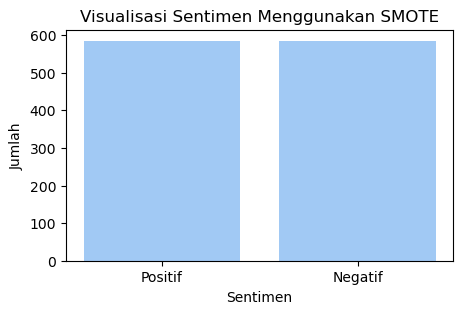

In [105]:
sentimen_counts = y_train_resampled.value_counts()

sns.set_palette("pastel")
plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

In [106]:
nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [107]:
y_pred = nb.predict(X_test_vec)

In [108]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['negatif', 'positif'])

print("Classification report after SMOTE :\n\n", classification_rep)

Classification report after SMOTE :

               precision    recall  f1-score   support

     negatif       0.76      0.35      0.47        55
     positif       0.71      0.94      0.81        93

    accuracy                           0.72       148
   macro avg       0.73      0.64      0.64       148
weighted avg       0.73      0.72      0.68       148

